# Figures 6, 6-1, & 7-2

Decoding results

In [1]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import analysis
from analysis import CONTINUOUS_NATURAL
from metadata import METADATA

In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
OUTPUT_DIR = Path('figures')

## Figure 6

In [4]:
path = "results/decoding__stimuli-unscrambled_scrambled__decode-category__scoring-balanced_accuracy.parquet"
data = pd.read_parquet(path)

In [5]:
assert len(set(data['chance'])) == 1
chance = data['chance'].iloc[0]
chance

0.5

PosixPath('figures/fig_6/decoding__stimuli-unscrambled_scrambled__decode-category__scoring-balanced_accuracy.svg')

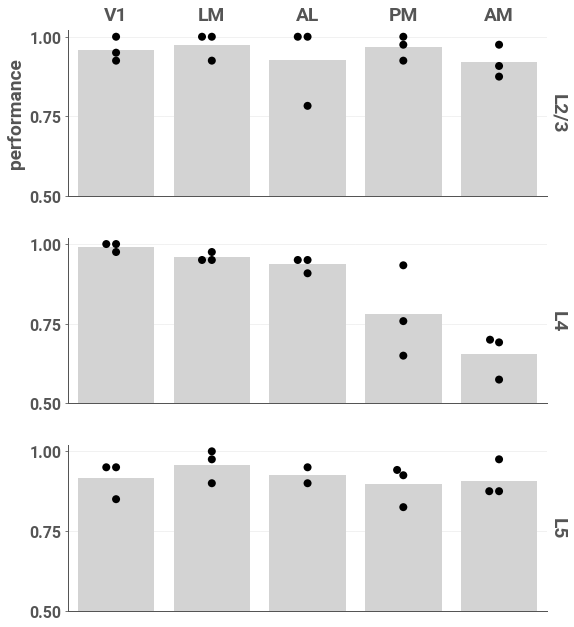

In [6]:
fig, axes, grid = analysis.faceted_plot(
    data=data.rename(columns=dict(balanced_accuracy="performance")),
    y="performance",
    row="layer",
    col="area",
    color="black",
    height=3,
    aspect=0.55,
    s=8,
)

grid.set(
    yticks=np.linspace(0.5, 1.0, 3),
    ylim=(0.5, 1.02),
)

plt.subplots_adjust(hspace=0.25, wspace=0.0)

analysis.savefig(fig, OUTPUT_DIR / "fig_6" / Path(path).stem)

## Figure 6-1

In [7]:
path = "results/decoding__stimuli-all__decode-identity__scoring-balanced_accuracy.parquet"
data = pd.read_parquet(path)

In [8]:
assert len(set(data['chance'])) == 1
chance = data['chance'].iloc[0]
chance

0.08333333333333333

PosixPath('figures/fig_6-1/decoding__stimuli-all__decode-identity__scoring-balanced_accuracy.svg')

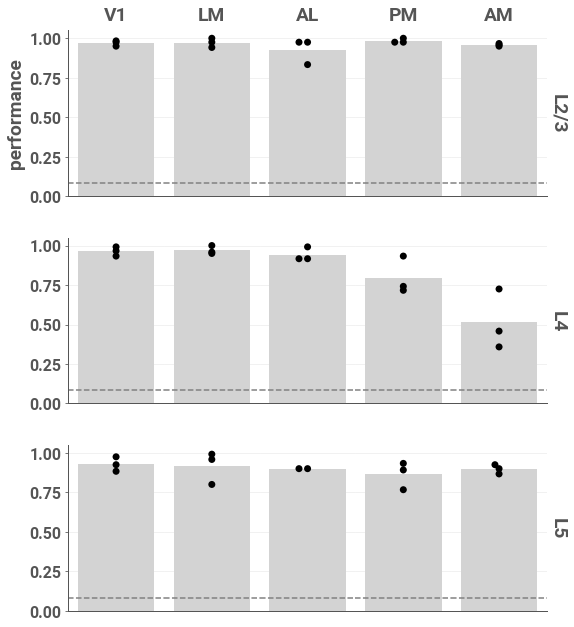

In [9]:
fig, axes, grid = analysis.faceted_plot(
    data=data.rename(columns=dict(balanced_accuracy="performance")),
    y="performance",
    row="layer",
    col="area",
    color="black",
    height=3,
    aspect=0.55,
    s=7,
)

for ax in axes.flat:
    ax.axhline(chance, 0, 1, color='grey', linestyle='--')
    
plt.subplots_adjust(hspace=0.25, wspace=0.0)

analysis.savefig(fig, OUTPUT_DIR / "fig_6-1" / Path(path).stem)

## Figure 7-1

### Load data

In [10]:
nd_data = pd.read_parquet("results/main.parquet")

# Continuous natural stimuli
nd_data = nd_data.loc[
    nd_data['stimulus'].isin(CONTINUOUS_NATURAL)
]

In [11]:
decoding_data = pd.read_parquet("results/decoding__stimuli-continuous_natural__decode-identity__scoring-f1_score.parquet")
decoding_data = (
    decoding_data
    .melt(
        id_vars='session',
        value_vars=[col for col in decoding_data.columns if col.startswith("test_")],
        var_name="stimulus",
        value_name='f1_score',
    )
    .merge(METADATA, on='session')
)
decoding_data['stimulus'] = decoding_data['stimulus'].map(lambda name: name.replace('test_', ''))

# Continuous natural stimuli
decoding_data = decoding_data.loc[
    decoding_data['stimulus'].isin(CONTINUOUS_NATURAL)
]

### Compute pairwise differences

In [12]:
order = [
    'snake (predator)',
    'mousecam',
    'conspecifics',
    'crickets (prey)',
    'man writing',
]

assert set(order) == set(CONTINUOUS_NATURAL)

In [13]:
nd_differences = analysis.pairwise_cohens_d_by_layer_area(nd_data, "log(normalized differentiation)", "stimulus", order)

In [14]:
decoding_differences = analysis.pairwise_cohens_d_by_layer_area(decoding_data, 'f1_score', 'stimulus', order)

### Plot

In [15]:
# Plot on same scale
vmax = max(nd_differences["Cohen's d"].abs().max(), decoding_differences["Cohen's d"].abs().max())
vmin = -vmax

/home/wmayner/miniconda3/envs/openscope-differentiation-test3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


PosixPath('figures/fig_7-2/nd.svg')

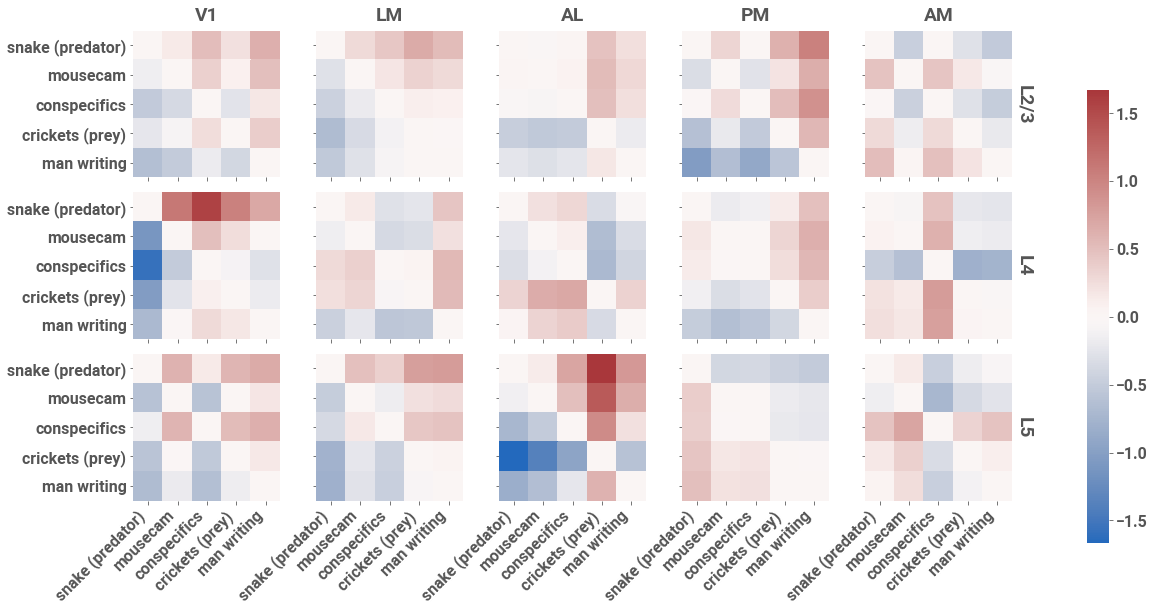

In [16]:
grid = analysis.layer_area_heatmap(nd_differences, "Cohen's d", vmin=vmin, vmax=vmax)
analysis.savefig(grid.fig, OUTPUT_DIR / 'fig_7-2' / 'nd')

/home/wmayner/miniconda3/envs/openscope-differentiation-test3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


PosixPath('figures/fig_7-2/decoding.svg')

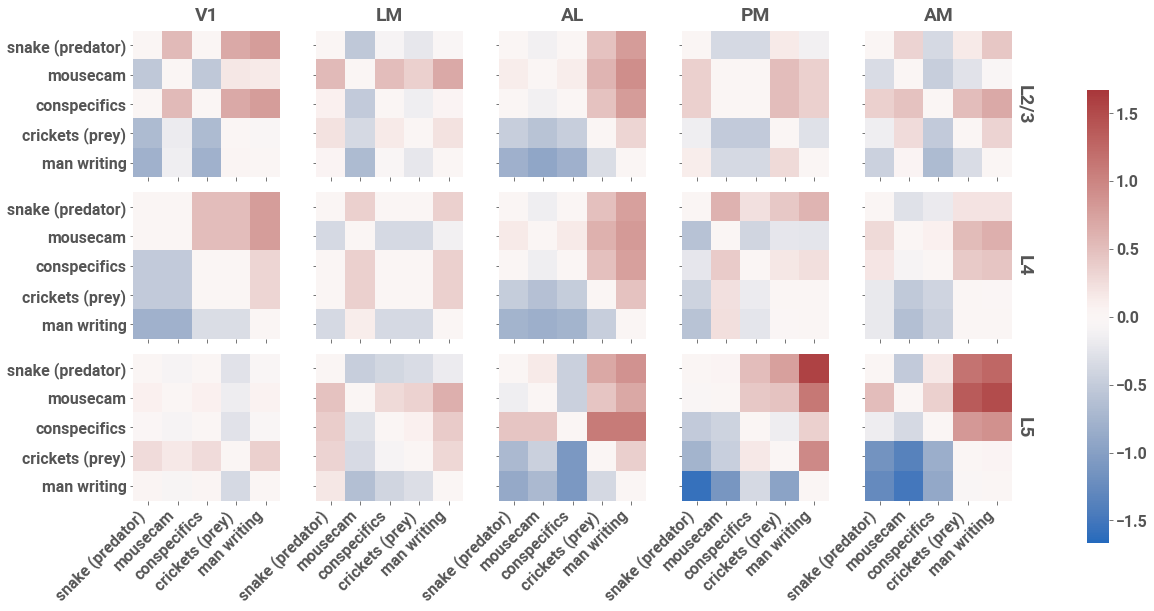

In [17]:
grid = analysis.layer_area_heatmap(decoding_differences, "Cohen's d", vmin=vmin, vmax=vmax)
analysis.savefig(grid.fig, OUTPUT_DIR / 'fig_7-2' / 'decoding')